<a href="https://colab.research.google.com/github/listvemel/Health-and-stress/blob/main/health-stress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [29]:
data = pd.read_csv("data.csv", sep=',')
df = data.copy()
df.columns = [i.lower() for i in df.columns]
df.columns = df.columns.str.replace(' ', '_')
df = df.drop('person_id', axis = 1)
df

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [30]:
df['bmi_category'] = df['bmi_category'].replace({'Normal Weight': 'Normal'})

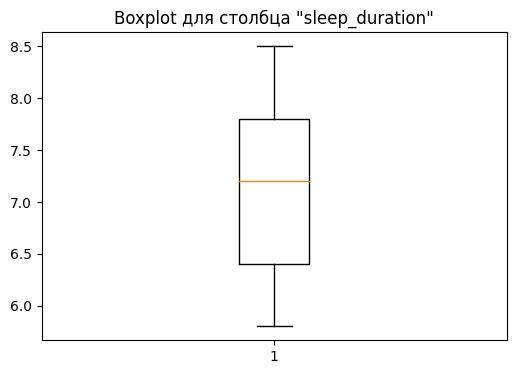

In [31]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['sleep_duration'])
plt.title('Boxplot для столбца "sleep_duration"')
plt.show()

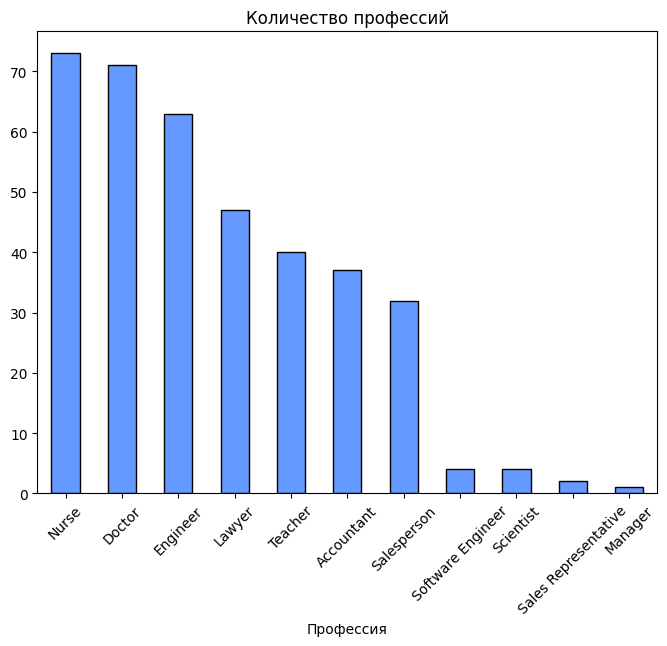

In [32]:
occupation_counts = df['occupation'].value_counts()
plt.figure(figsize=(8, 6))
occupation_counts.plot(kind='bar', color='#6699FF', edgecolor='black')
plt.title('Количество профессий')
plt.xlabel('Профессия')
plt.xticks(rotation=45)
plt.show()

<ipython-input-33-93a56fb6922e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


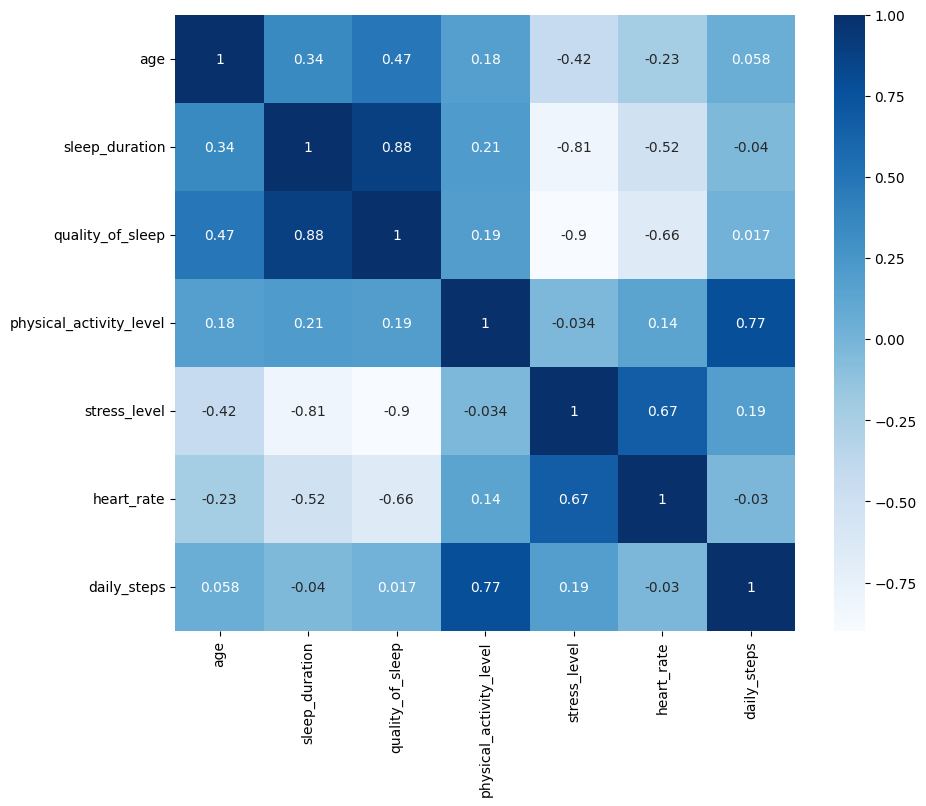

In [33]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()

In [34]:
df.head()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [35]:
df['bmi'] = df['bmi_category'].apply(lambda x: 1 if ((x == 'Normal') | (x == 'Normal Weight')) else 0)
df['sd'] = df['sleep_disorder'].apply(lambda x: 1 if x == 'None' else 0)
df['zoz'] = df['sleep_duration']/max(df['sleep_duration']) + df['physical_activity_level']/max(df['physical_activity_level']) + df['daily_steps']/max(df['daily_steps']) + df['bmi'] + df['sd']/max(df['sd'])
df['sl'] = df['stress_level'] / max(df['stress_level'])
df['ploxo'] = df['sl']

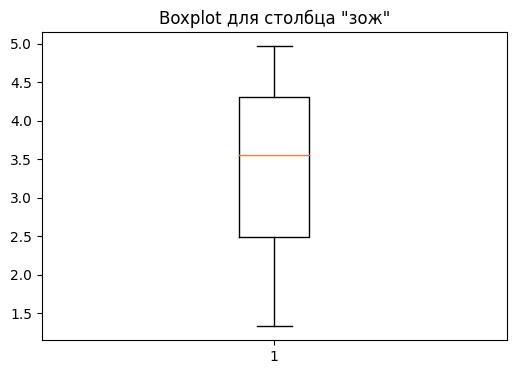

In [36]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['zoz'])
plt.title('Boxplot для столбца "зож"')
plt.show()

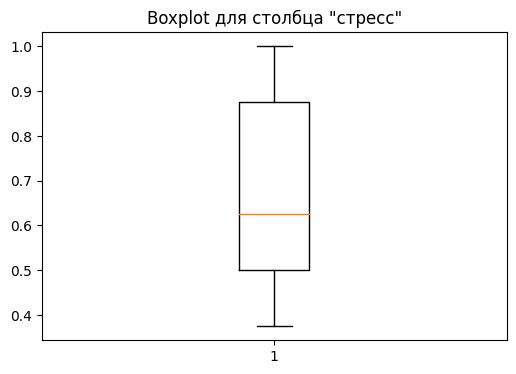

In [37]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['ploxo'])
plt.title('Boxplot для столбца "стресс"')
plt.show()

In [38]:
df10 = df[df['ploxo'] >= df.ploxo.mean()]
df20 = df[df['ploxo'] < df.ploxo.mean()]

In [39]:
df12 = df10[df10['gender'] == 'Female']
df22 = df20[df20['gender'] == 'Female']
df11 = df10[df10['gender'] == 'Male']
df21 = df20[df20['gender'] == 'Male']

In [40]:
statistic, p_value = stats.mannwhitneyu(df12['zoz'], df22['zoz'])
if p_value < 0.05:
    print("Различия  статистически значимы.", p_value)
else:
    print("Нет статистически значимых различий ")

Различия  статистически значимы. 0.002500667885561742


In [41]:
statistic, p_value = stats.mannwhitneyu(df11['zoz'], df21['zoz'])
if p_value < 0.05:
    print("Различия  статистически значимы.", p_value)
else:
    print("Нет статистически значимых различий ")

Различия  статистически значимы. 6.096393175183326e-10


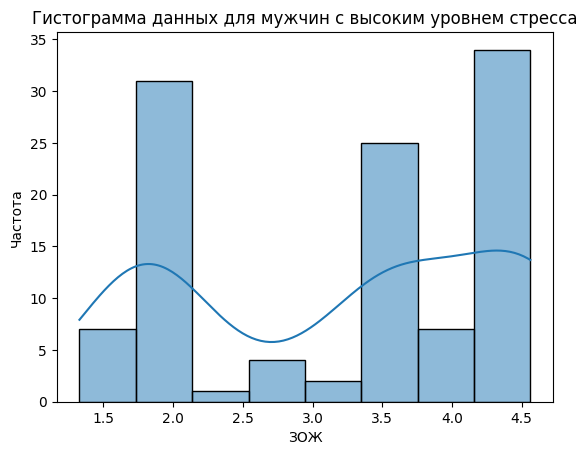

In [50]:
sns.histplot(df11.zoz, kde=True)
plt.title('Гистограмма данных для мужчин с высоким уровнем стресса')
plt.xlabel('ЗОЖ')
plt.ylabel('Частота')
plt.show()

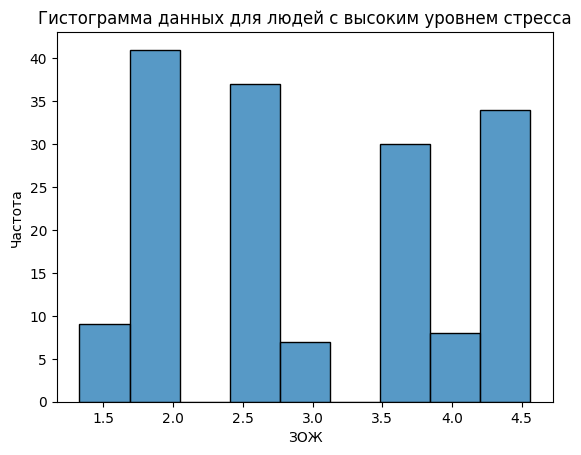

In [53]:
sns.histplot(df10.zoz)
plt.title('Гистограмма данных для людей с высоким уровнем стресса')
plt.xlabel('ЗОЖ')
plt.ylabel('Частота')
plt.show()

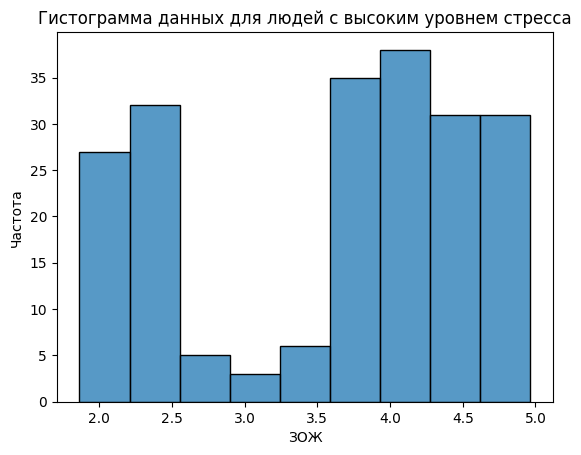

In [54]:
sns.histplot(df20.zoz)
plt.title('Гистограмма данных для людей с высоким уровнем стресса')
plt.xlabel('ЗОЖ')
plt.ylabel('Частота')
plt.show()

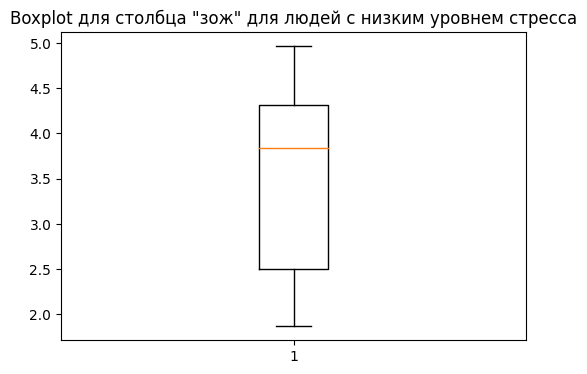

In [47]:
plt.figure(figsize=(6, 4))
plt.boxplot(df20['zoz'])
plt.title('Boxplot для столбца "зож" для людей с низким уровнем стресса')
plt.show()

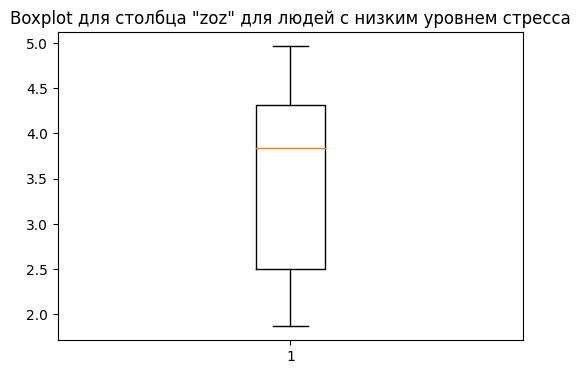

In [44]:
plt.figure(figsize=(6, 4))
plt.boxplot(df20['zoz'])
plt.title('Boxplot для столбца "zoz" для людей с низким уровнем стресса')
plt.show()

In [45]:
x = df['zoz']
y = df['ploxo']
correlation_coefficient = np.corrcoef(x, y)[0, 1]
print(correlation_coefficient)

-0.2163444073981433
